# Zindi Online Challenge
https://zindi.africa/hackathons/dsn-pre-bootcamp-hackathon-expresso-churn-prediction-challenge

## Contents
    1. Imports
    2. EDA
    3. Feature Selection
    4. BenchMarking
    5. Test Data
    6. Machine Learning
 
 
 

#  1. Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10,6)})

# 1.1 Helper Functions

In [6]:
class DataProcess:
    def __init__ (self,df):
        self.df = df
        
    def Numerical (df):
        return df.select_dtypes(include= ['int64', 'float64'])
    
    def Categorical (df):
        return df.select_dtypes(include= ['object'])
    
    def Missing (df):
        return sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
    
    def df_joiner(df1, df2):
        return pd.concat(df1, df2)
    
    def get_month(x):
        return (x.month)
    
    def get_year(x):
        return (x.year)
    
    def get_day(x):
        return (x.day)
    
    def correlation_map(df):
        # create figure and axes and set figure size
        f, ax = plt.subplots(figsize =(20,10))
        return sns.heatmap(data=df.corr(), annot = False)


# 1.2 Read in Data

In [79]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
VariableDefinitions= pd.read_csv('VariableDefinitions.csv')

In [80]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [9]:
train.info

<bound method DataFrame.info of                                          user_id       REGION        TENURE  \
0       dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063  SAINT-LOUIS  K > 24 month   
1       71c44b5ba328db5c4192a80f7cf8f244d9350ed0          NaN  K > 24 month   
2       ce46411b1526c94f20a383b8cb188f8d27f82a0a  TAMBACOUNDA  K > 24 month   
3       f467cdb6669818373c26c2bad44e01ba66f97d21       FATICK  K > 24 month   
4       ec45e1a1888a32b5dcce0954cfec20c6e037db31       FATICK  K > 24 month   
...                                          ...          ...           ...   
399995  a892ad4ed0eda8dc721733200c47147763b183ec  TAMBACOUNDA  K > 24 month   
399996  13daa3a651bf0192a413b339c4766aeafc6d1636          NaN  K > 24 month   
399997  767f596aee426962f7d92f4de8d7b232cdc17568          NaN  K > 24 month   
399998  b831e4d3b59a1e294e9e0a2aab391bc12d50845c          NaN  K > 24 month   
399999  a80e3a164986e489102cfb538fa62e16ecc28adf          NaN  K > 24 month   

        MONTANT  FR

In [10]:
categorical_feat = DataProcess.Categorical(train)
numerical_feat = DataProcess.Numerical(train)

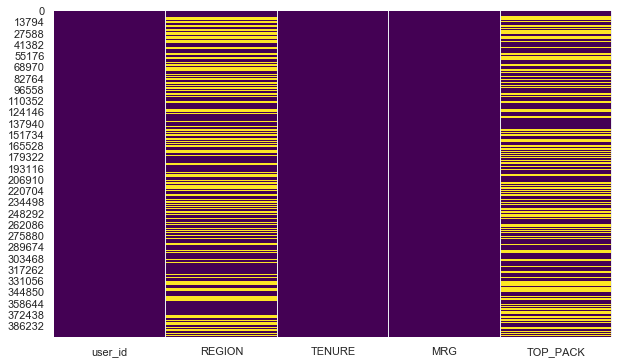

In [12]:
DataProcess.Missing(categorical_feat);

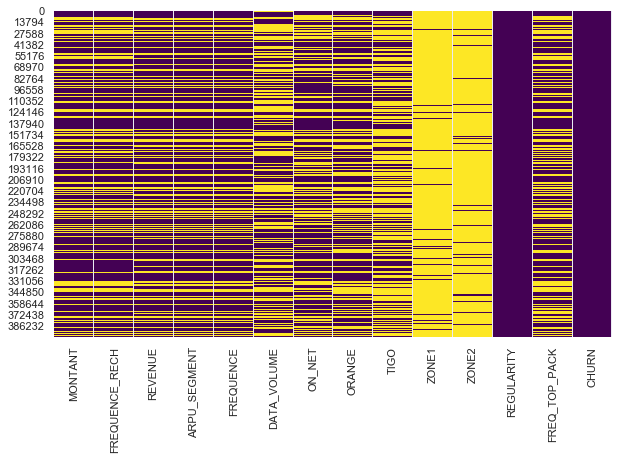

In [13]:
DataProcess.Missing(numerical_feat);

In [14]:
new_df = train.dropna()

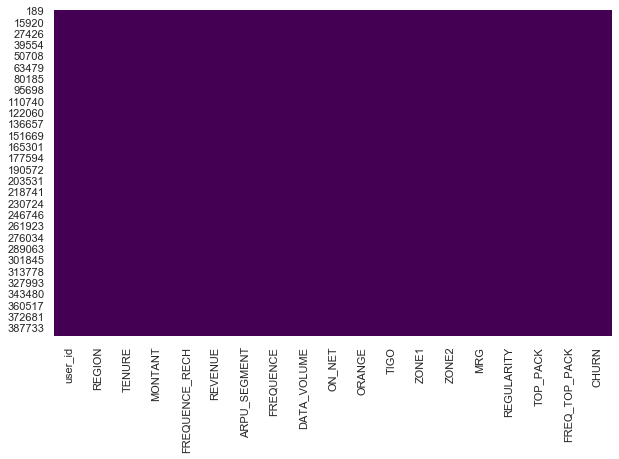

In [15]:
DataProcess.Missing(new_df);

In [16]:
new_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
189,e32b4d6132ff45789b023165cfac5fd71a959727,DAKAR,K > 24 month,14650.0,35.0,15507.0,5169.0,40.0,8743.0,29.0,63.0,2.0,9.0,1.0,NO,62,IVR Echat_Daily_50F,19.0,0
216,5013300a472c15643f6866876293000800cee62f,KAFFRINE,K > 24 month,4950.0,16.0,4962.0,1654.0,21.0,0.0,67.0,73.0,3.0,2.0,3.0,NO,30,Mixt 250F=Unlimited_call24H,5.0,0
416,771522f0a275a05d2046b2c93eb299402289f4aa,DAKAR,K > 24 month,6350.0,16.0,6337.0,2112.0,19.0,10252.0,7.0,3.0,9.0,1.0,0.0,NO,54,"Data:490F=1GB,7d",7.0,0
875,b41ce03b52f2d841f33bdd8a1cbd89bdaefb71ac,SAINT-LOUIS,K > 24 month,3750.0,12.0,3847.0,1282.0,18.0,998.0,12.0,32.0,2.0,0.0,5.0,NO,54,"Data: 100 F=40MB,24H",2.0,0
1158,6bfaf8a3fc1d74cffee41d59595476f3ae10ad4b,LOUGA,K > 24 month,15000.0,2.0,13969.0,4656.0,29.0,5709.0,295.0,164.0,47.0,2.0,0.0,NO,62,Twter_U2opia_Weekly,11.0,0


In [17]:
new_df['TOP_PACK'].value_counts()

All-net 500F=2000F;5d                           601
Data:490F=1GB,7d                                214
On net 200F=Unlimited _call24H                  150
Data: 100 F=40MB,24H                            135
IVR Echat_Daily_50F                             106
Data: 200 F=100MB,24H                           102
Mixt 250F=Unlimited_call24H                     102
MIXT: 200mnoff net _unl on net _5Go;30d         101
MIXT:500F= 2500F on net _2500F off net;2d        92
Jokko_Daily                                      73
Data:1000F=2GB,30d                               65
VAS(IVR_Radio_Daily)                             42
Data:1000F=5GB,7d                                41
Data:200F=Unlimited,24H                          39
All-net 500F =2000F_AllNet_Unlimited             39
All-net 1000=5000;5d                             24
Twter_U2opia_Weekly                              17
Twter_U2opia_Daily                               17
On-net 500=4000,10d                              14
All-net 600F

In [40]:
new_df['TENURE'].value_counts()

K > 24 month     1980
I 18-21 month      36
H 15-18 month      18
G 12-15 month      13
F 9-12 month       13
J 21-24 month      13
E 6-9 month         1
Name: TENURE, dtype: int64

In [18]:
new_df['REGION'].value_counts()

DAKAR          1315
THIES           170
SAINT-LOUIS     125
KAOLACK         103
TAMBACOUNDA      69
KOLDA            69
LOUGA            55
ZIGUINCHOR       50
FATICK           33
DIOURBEL         29
MATAM            22
KAFFRINE         22
SEDHIOU          10
KEDOUGOU          2
Name: REGION, dtype: int64

In [19]:
new_df['MONTANT'].value_counts()

12000.0    28
13000.0    23
14000.0    22
3000.0     21
8500.0     20
           ..
42700.0     1
19800.0     1
31050.0     1
84750.0     1
6999.0      1
Name: MONTANT, Length: 677, dtype: int64

In [20]:
new_df['ORANGE'].value_counts()

1.0       21
3.0       19
14.0      19
0.0       18
24.0      18
          ..
556.0      1
483.0      1
562.0      1
386.0      1
1095.0     1
Name: ORANGE, Length: 656, dtype: int64

In [21]:
new_df['ORANGE'].value_counts()

1.0       21
3.0       19
14.0      19
0.0       18
24.0      18
          ..
556.0      1
483.0      1
562.0      1
386.0      1
1095.0     1
Name: ORANGE, Length: 656, dtype: int64

In [22]:
new_df['CHURN'].value_counts()

0    2070
1       4
Name: CHURN, dtype: int64

In [23]:
VariableDefinitions.head(25)

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [24]:
new_df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000
mean,16814.525072,27.782546,17139.467695,5713.160077,34.010608,7757.642719,436.540019,245.164417,34.944552,9.364513,8.281099,55.667310,19.305689,0.001929
std,14034.323154,19.087643,14271.327219,4757.109585,19.077542,13991.202289,996.194104,354.052056,73.255813,43.874940,21.301130,9.773717,19.025920,0.043884
min,400.000000,1.000000,301.000000,100.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,8200.000000,13.000000,8357.500000,2785.750000,19.000000,5.000000,19.250000,40.000000,3.000000,0.000000,0.000000,53.000000,6.000000,0.000000
50%,13750.000000,24.000000,13895.000000,4631.500000,31.000000,2361.000000,96.500000,133.000000,11.000000,1.000000,2.000000,61.000000,14.000000,0.000000
75%,21500.000000,39.000000,21994.250000,7331.750000,46.000000,9644.500000,368.000000,313.000000,34.000000,4.000000,6.000000,62.000000,26.000000,0.000000
max,215000.000000,100.000000,226150.000000,75383.000000,91.000000,182985.000000,15188.000000,3637.000000,1275.000000,1204.000000,300.000000,62.000000,257.000000,1.000000


In [25]:
train_df= new_df[['MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','TIGO','ZONE1','ZONE2','REGULARITY','FREQ_TOP_PACK','CHURN']]

In [26]:
train_df['MONTANT']=train_df['MONTANT']/50
train_df['REVENUE']=train_df['REVENUE']/60
train_df['ARPU_SEGMENT']=train_df['ARPU_SEGMENT']/50
train_df['DATA_VOLUME']=train_df['DATA_VOLUME']/60
train_df['ON_NET']=train_df['ON_NET']/50
#train_df['ORANGE']=train_df['ORANGE']/10
#train_df['ZONE2']=train_df['ZONE2']/10
train_df['FREQ_TOP_PACK']=train_df['FREQ_TOP_PACK']/5



In [27]:
train_df.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
189,293.0,35.0,258.450000,103.38,40.0,145.716667,0.58,2.0,9.0,1.0,62,3.8,0
216,99.0,16.0,82.700000,33.08,21.0,0.000000,1.34,3.0,2.0,3.0,30,1.0,0
416,127.0,16.0,105.616667,42.24,19.0,170.866667,0.14,9.0,1.0,0.0,54,1.4,0
875,75.0,12.0,64.116667,25.64,18.0,16.633333,0.24,2.0,0.0,5.0,54,0.4,0
1158,300.0,2.0,232.816667,93.12,29.0,95.150000,5.90,47.0,2.0,0.0,62,2.2,0


In [28]:
train_df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000
mean,336.290501,27.782546,285.657795,114.263202,34.010608,129.294045,8.730800,34.944552,9.364513,8.281099,55.667310,3.861138,0.001929
std,280.686463,19.087643,237.855454,95.142192,19.077542,233.186705,19.923882,73.255813,43.874940,21.301130,9.773717,3.805184,0.043884
min,8.000000,1.000000,5.016667,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,0.000000
25%,164.000000,13.000000,139.291667,55.715000,19.000000,0.083333,0.385000,3.000000,0.000000,0.000000,53.000000,1.200000,0.000000
50%,275.000000,24.000000,231.583333,92.630000,31.000000,39.350000,1.930000,11.000000,1.000000,2.000000,61.000000,2.800000,0.000000
75%,430.000000,39.000000,366.570833,146.635000,46.000000,160.741667,7.360000,34.000000,4.000000,6.000000,62.000000,5.200000,0.000000
max,4300.000000,100.000000,3769.166667,1507.660000,91.000000,3049.750000,303.760000,1275.000000,1204.000000,300.000000,62.000000,51.400000,1.000000


In [29]:
new_df['CHURN'].value_counts()

0    2070
1       4
Name: CHURN, dtype: int64

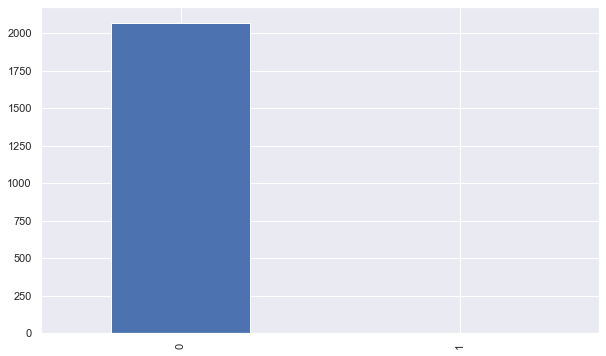

In [30]:
new_df['CHURN'].value_counts().plot(kind='bar')

## CHURNED

In [31]:
4/(4+2070)*100

0.19286403085824494

## STAYED(NOT CHURNED)

In [32]:
2070/(4+2070)*100

99.80713596914175

#   5. Test Data

In [33]:
categorical_feat = DataProcess.Categorical(test)
numerical_feat = DataProcess.Numerical(test)

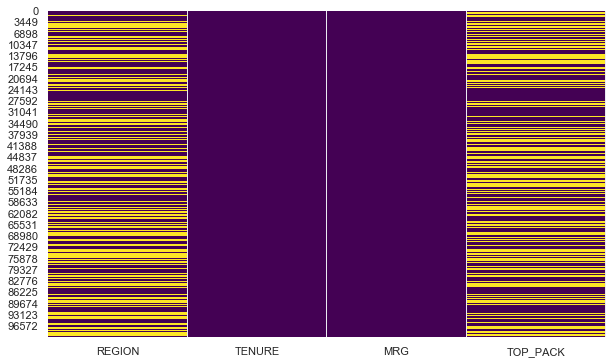

In [177]:
DataProcess.Missing(categorical_feat);

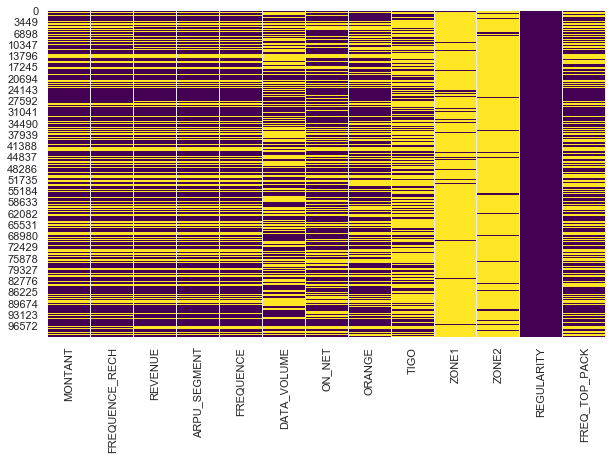

In [84]:
DataProcess.Missing(numerical_feat );

In [35]:
new_test_df = test.dropna()

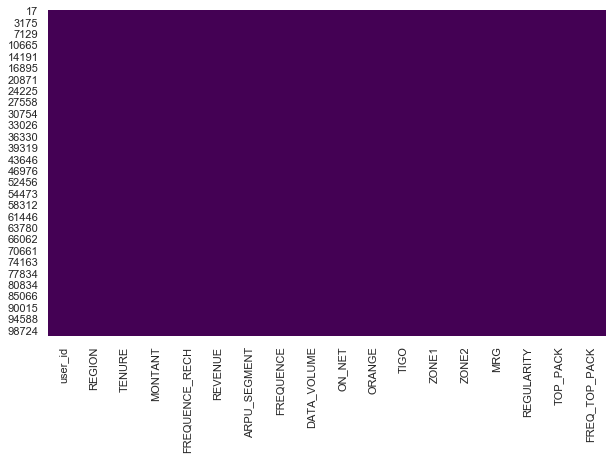

In [36]:
DataProcess.Missing(new_test_df);

In [37]:
new_test_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
17,eb08c76bd3c26b8e3569df003b0ad06fe4018a76,KOLDA,K > 24 month,12500.0,22.0,13398.0,4466.0,26.0,0.0,375.0,340.0,4.0,3.0,3.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,12.0
165,c88870e29d3ee4d1655c797e210a83d92c555e96,DAKAR,K > 24 month,17000.0,33.0,17221.0,5740.0,42.0,4411.0,9.0,135.0,5.0,1.0,12.0,NO,62,All-net 500F=2000F;5d,10.0
171,c4359492078d723bad950c996799747e1b9db243,DAKAR,I 18-21 month,4000.0,4.0,4004.0,1335.0,4.0,0.0,13.0,24.0,22.0,8.0,2.0,NO,36,All-net 500F=2000F;5d,4.0
249,8cef60cd4b76f46dee7ca8d2e97db55b90cedc95,DAKAR,K > 24 month,22700.0,37.0,24709.0,8236.0,52.0,14625.0,4.0,39.0,1.0,0.0,23.0,NO,62,"Data:200F=Unlimited,24H",33.0
348,c6ab0ae342fa3ad197f02a2198b9820a9ff8bced,DAKAR,K > 24 month,8800.0,11.0,10290.0,3430.0,13.0,644.0,116.0,335.0,13.0,0.0,0.0,NO,50,"Data:200F=Unlimited,24H",7.0


In [38]:
new_df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000
mean,16814.525072,27.782546,17139.467695,5713.160077,34.010608,7757.642719,436.540019,245.164417,34.944552,9.364513,8.281099,55.667310,19.305689,0.001929
std,14034.323154,19.087643,14271.327219,4757.109585,19.077542,13991.202289,996.194104,354.052056,73.255813,43.874940,21.301130,9.773717,19.025920,0.043884
min,400.000000,1.000000,301.000000,100.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,8200.000000,13.000000,8357.500000,2785.750000,19.000000,5.000000,19.250000,40.000000,3.000000,0.000000,0.000000,53.000000,6.000000,0.000000
50%,13750.000000,24.000000,13895.000000,4631.500000,31.000000,2361.000000,96.500000,133.000000,11.000000,1.000000,2.000000,61.000000,14.000000,0.000000
75%,21500.000000,39.000000,21994.250000,7331.750000,46.000000,9644.500000,368.000000,313.000000,34.000000,4.000000,6.000000,62.000000,26.000000,0.000000
max,215000.000000,100.000000,226150.000000,75383.000000,91.000000,182985.000000,15188.000000,3637.000000,1275.000000,1204.000000,300.000000,62.000000,257.000000,1.000000


In [39]:
test_df= new_test_df[['MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','TIGO','ZONE1','ZONE2','REGULARITY','FREQ_TOP_PACK',]]

In [40]:
test_df['MONTANT']=test_df['MONTANT']/50
test_df['REVENUE']=test_df['REVENUE']/60
test_df['ARPU_SEGMENT']=test_df['ARPU_SEGMENT']/50
test_df['DATA_VOLUME']=test_df['DATA_VOLUME']/60
test_df['ON_NET']=test_df['ON_NET']/50
test_df['FREQ_TOP_PACK']=test_df['FREQ_TOP_PACK']/5

In [41]:
test_df.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
17,250.0,22.0,223.300000,89.32,26.0,0.000000,7.50,4.0,3.0,3.0,62,2.4
165,340.0,33.0,287.016667,114.80,42.0,73.516667,0.18,5.0,1.0,12.0,62,2.0
171,80.0,4.0,66.733333,26.70,4.0,0.000000,0.26,22.0,8.0,2.0,36,0.8
249,454.0,37.0,411.816667,164.72,52.0,243.750000,0.08,1.0,0.0,23.0,62,6.6
348,176.0,11.0,171.500000,68.60,13.0,10.733333,2.32,13.0,0.0,0.0,50,1.4


In [42]:
test_df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,351.287572,27.259259,294.531241,117.812181,33.944444,131.693278,10.552881,34.936214,10.162551,9.528807,55.738683,3.913992
std,264.625445,17.996181,221.967611,88.786697,18.807845,216.045236,31.467872,76.537101,35.616866,27.881454,10.230923,4.727852
min,12.000000,1.000000,10.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000
25%,173.750000,13.000000,146.533333,58.615000,19.250000,0.083333,0.400000,3.000000,0.000000,0.000000,54.000000,1.400000
50%,274.000000,24.000000,229.000000,91.600000,31.000000,35.558333,1.840000,12.000000,1.000000,1.500000,61.000000,2.800000
75%,460.000000,37.000000,386.266667,154.510000,44.750000,183.787500,7.830000,39.000000,5.000000,6.000000,62.000000,5.200000
max,1965.000000,95.000000,1661.566667,664.620000,86.000000,1661.400000,414.900000,1005.000000,403.000000,351.000000,62.000000,73.000000


In [43]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [44]:
train_df.head(1)

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
189,293.0,35.0,258.45,103.38,40.0,145.716667,0.58,2.0,9.0,1.0,62,3.8,0


In [45]:
test_df.head(1)

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
17,250.0,22.0,223.3,89.32,26.0,0.0,7.5,4.0,3.0,3.0,62,2.4


In [50]:
X_train = train_df.drop('CHURN',axis=1)
y_train = train_df['CHURN']

In [51]:
X_train, X_test, y_train, y_test =train_test_split(X_train,y_train, test_size=0.3)

In [52]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.9967897271268058


In [54]:
x_sample= test_df

In [55]:
predictions = clf.predict(x_sample)

In [148]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [188]:
len(predictions)

486

In [56]:
results = {'user_id':new_test_df['user_id'], 'CHURN':predictions}
results = pd.DataFrame(results)

In [57]:
results.to_csv('sample_submissions_new.csv', index=False)

In [81]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [82]:
test.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,65049.000000,65049.000000,66510.000000,66510.000000,66510.000000,50662.000000,63617.000000,58800.000000,40212.000000,7680.000000,6422.000000,100000.000000,58297.000000
mean,5545.613630,11.545051,5518.341663,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,8.373307,7.678138,28.122430,9.276035
std,7123.955226,13.271270,7177.840304,2392.609422,14.655983,10515.256185,870.773904,201.962296,66.932661,40.822161,32.259672,22.324101,12.369808
min,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,268.000000,27.000000,28.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,7400.000000,16.000000,7399.000000,2466.000000,20.000000,2923.000000,157.000000,99.000000,20.000000,4.000000,5.000000,51.000000,12.000000
max,201500.000000,120.000000,181135.000000,60378.000000,91.000000,474262.000000,24887.000000,5695.000000,3083.000000,1366.000000,1017.000000,62.000000,390.000000


In [83]:
len(test)

100000

In [72]:
new_test = test[['MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','TIGO','ZONE1','ZONE2','REGULARITY','FREQ_TOP_PACK',]]
new_test.fillna(0, inplace=True)
new_test.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0
2,1900.0,15.0,2299.0,766.0,21.0,414.0,0.0,2.0,0.0,0.0,27,17.0
3,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,4.0,0.0,0.0,46,3.0
4,32000.0,47.0,33000.0,11000.0,47.0,0.0,128.0,280.0,0.0,0.0,61,65.0


In [73]:
predictions = clf.predict(new_test)

In [74]:
print(predictions)

[0 0 0 ... 0 0 0]


In [75]:
len(predictions)

100000

In [84]:
results = {'user_id':test['user_id'], 'CHURN':predictions}
results = pd.DataFrame(results)

In [85]:
results.to_csv('sample_submissions_new1.csv', index=False)